In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from celluloid import Camera
from matplotlib import cm
from hamiltonian_gas import HamiltonianGasSystem
from gas_dynamics import GasDynamics
import gas_potential
import gas_interaction

In [2]:
dimension: int = 2
num_particles: int = 100
box_size: float = 1.
half_box_size: float = box_size/2

In [3]:
coordinates = (np.random.rand(num_particles, dimension)/2)
momentums = 0*np.random.normal(0, 0.5, (num_particles, dimension))
# coordinates = np.array([
#     [0.21,0],
#     [-0.2, 0],
# ])
# momentums = np.array([
#     [-0.93, 0],
#     [0.93, 0],
# ])
coordinates, momentums

(array([[0.46938659, 0.41511408],
        [0.14749259, 0.29951919],
        [0.08662595, 0.03559478],
        [0.15321689, 0.38392755],
        [0.32568427, 0.06777801],
        [0.44920591, 0.06011618],
        [0.38008781, 0.20613877],
        [0.43065763, 0.27868883],
        [0.3649497 , 0.2066941 ],
        [0.22181181, 0.11734542],
        [0.24063916, 0.11650969],
        [0.29444461, 0.00302898],
        [0.39032903, 0.38896647],
        [0.03023766, 0.15757   ],
        [0.14724052, 0.4834083 ],
        [0.06050344, 0.15588924],
        [0.10754912, 0.35039322],
        [0.24614054, 0.39324358],
        [0.49363785, 0.05943134],
        [0.42541943, 0.17822612],
        [0.44501507, 0.08586345],
        [0.28573549, 0.11533697],
        [0.44277121, 0.14139133],
        [0.23574369, 0.03043567],
        [0.34271823, 0.16115675],
        [0.12301499, 0.10533349],
        [0.27871772, 0.4494025 ],
        [0.42988973, 0.47912565],
        [0.48373931, 0.0414628 ],
        [0.072

In [7]:
gas = HamiltonianGasSystem(m=1,
                           outer_potential=gas_potential.SimpleQuadraticPotential(a=0),
                           interaction=gas_interaction.M1Interaction(r0=0.02, u0=0.05),
                          )
gas.initial_energy = gas.energy(coordinates, momentums)
print(gas.initial_energy)

gas_dynamics = GasDynamics(gas.d_hamiltonian_d_coordinates, gas.d_hamiltonian_d_momentums, half_box_size)

20.362068388766133


In [13]:
p_t = [momentums]
r_t = [coordinates]
energy_t = [ gas.energy(r_t[-1], p_t[-1]) ]
kin_t = [gas.kinetic_energy(p_t[-1]) ]
t = [0]
dt = 2**-10
for i in range(20000):
    r, p = gas_dynamics.sie(r_t[-1], p_t[-1], dt)
    gas_dynamics.walls(r, p)
    
    t.append(t[-1] + dt)
    r_t.append(r)
    p_t.append(p)
    kin_t.append(gas.kinetic_energy(p_t[-1]))
    energy_t.append(gas.energy(r_t[-1], p_t[-1]) )


p_t = np.array(p_t)
r_t = np.array(r_t)
energy_t = np.array(energy_t)
kin_t = np.array(kin_t)
t = np.array(t)

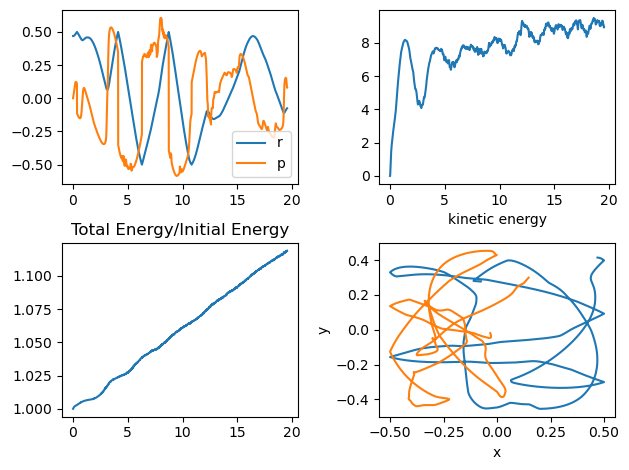

In [14]:


fig, ax = plt.subplots(2,2)
ax[0,0].plot(t, r_t[:,0,0], label='r' )
ax[0,0].plot(t, p_t[:,0,0], label='p' )
ax[0,0].legend()
ax[1,0].plot(t, energy_t/gas.initial_energy)
ax[1,0].set_title('Total Energy/Initial Energy')

ax[0,1].plot(t, kin_t)
ax[0,1].set_xlabel('time')
ax[0,1].set_xlabel('kinetic energy')


ax[1,1].plot([r[0][0] for r in r_t], [r[0][1] for r in r_t])
ax[1,1].plot([r[1][0] for r in r_t], [r[1][1] for r in r_t])

ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("y")

fig.tight_layout()

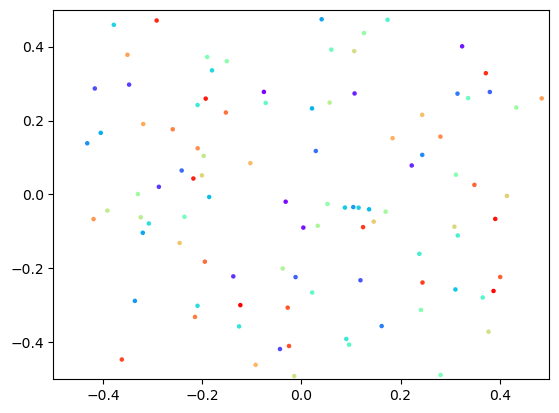

In [15]:
colors = cm.rainbow(np.linspace(0, 1, num_particles))
camera = Camera(plt.figure())
for r in r_t[::8]:
    plt.scatter(*r.T, c=colors, s=5)
    plt.xlim([-half_box_size,half_box_size])
    plt.ylim([-half_box_size, half_box_size])
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4', fps = 40)

In [48]:
np.save('data1/momentums.npy', p_t)

(array([[11695., 10266., 11679., 17519., 14733., 14738., 12790., 13328.,
          4456.,  3217.],
        [13272., 13796., 19779., 22906., 22278., 25113., 18202., 14872.,
         11104.,  7179.],
        [14048., 18278., 19477., 26126., 23510., 28509., 27523., 16066.,
         16815., 10285.],
        [17462., 20049., 23916., 33598., 31078., 29598., 35052., 22618.,
         16426., 10193.],
        [14315., 23921., 28292., 33950., 36854., 31907., 32087., 28166.,
         17840., 16140.],
        [17656., 26539., 29282., 30931., 30525., 31247., 31490., 30992.,
         25636., 16034.],
        [14447., 18139., 21466., 25397., 29115., 34250., 32020., 28152.,
         23074., 18093.],
        [ 9358., 15876., 19667., 20841., 24480., 29442., 26065., 24628.,
         19656., 16718.],
        [ 6551.,  9162., 15238., 18141., 21187., 21867., 23240., 21496.,
         16759., 13576.],
        [ 5683.,  6503.,  5575., 12617., 17537., 21189., 18440., 17385.,
         10905.,  8812.]]),
 array([

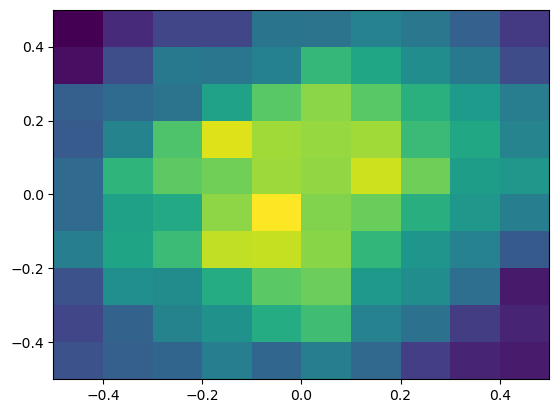

In [17]:
plt.hist2d( r_t[:,:,0].flatten(), r_t[:,:,1].flatten(),  )